In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
from cleaning_utils import *
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
country_df = pd.read_pickle("./country_df.pkl")
country_df = country_df.replace(to_replace = 'nan', value = np.nan)
country_df = country_df.dropna()
country_count = country_df.groupby('Country').nunique()

In [5]:
country_count = country_df.groupby('Country').nunique()
country_count.sort_values('Object Number', na_position='last',ascending=False, inplace=True)
country_count['Object Number'].astype(int)

nObj = len(country_df)
country_count['Percent'] = country_count['Object Number']/nObj
country_count.head(10)

,Object Number,Percent
Country,,
Egypt,31719,0.414768
United States,9606,0.125611
Iran,6800,0.088919
Peru,3502,0.045793
France,2097,0.027421
Byzantine Egypt,1673,0.021877
Mexico,1577,0.020621
India,1504,0.019667
England,1396,0.018255


<AxesSubplot:ylabel='Country'>

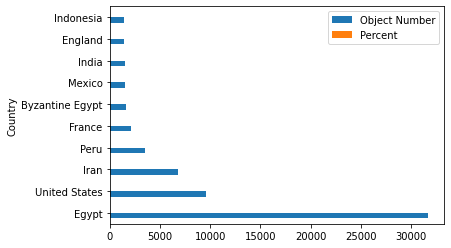

In [6]:
country_count.head(10).plot.barh()

In [7]:
country_pie = country_count.head(8)
p = 1 - country_pie['Percent'].sum()
n = len(country_df) - country_pie['Object Number'].sum()
print(n)
print(p)
dict = {'Object Number': [n],'Percent': [p]}
other = pd.DataFrame(dict)
country_pie= pd.concat([country_pie, other],ignore_index = False)
country_pie.index.values[8] = "Other"
country_pie.head(11)

17996
0.2353218087193033


,Object Number,Percent
Egypt,31719,0.414768
United States,9606,0.125611
Iran,6800,0.088919
Peru,3502,0.045793
France,2097,0.027421
Byzantine Egypt,1673,0.021877
Mexico,1577,0.020621
India,1504,0.019667
Other,17996,0.235322


<AxesSubplot:ylabel='Percent'>

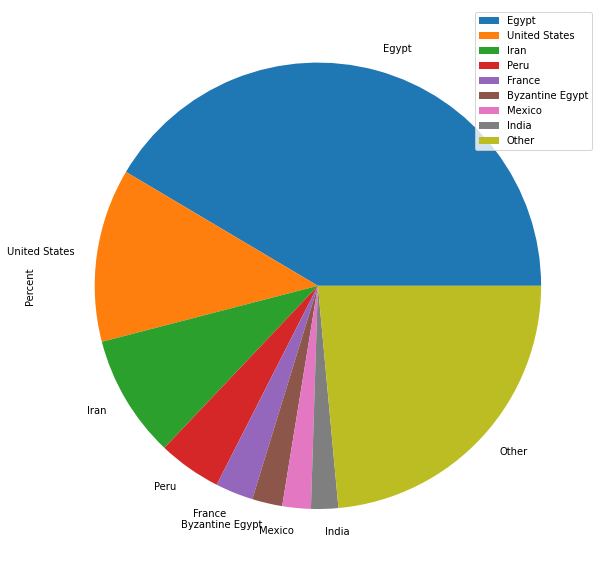

In [8]:
country_pie.plot.pie(y = 'Percent', figsize = (10,15))

Word Cloud Period

In [9]:
clean_df = pd.read_pickle("./clean_df.pkl")

In [12]:
Period_df = clean_df['Period'].replace(to_replace = 'nan', value = np.nan)
Period_df = Period_df.dropna()
period_text_list = str(Period_df.tolist())


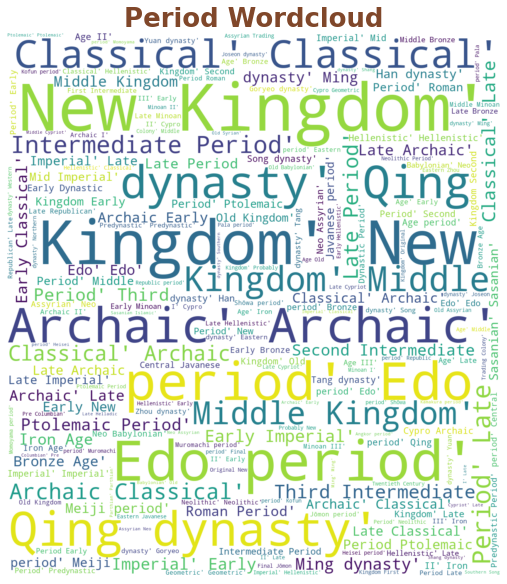

In [13]:
wc = WordCloud(background_color="white",contour_color='#80472a',contour_width=5, width=1280, height=1410,)
wc.generate(period_text_list)
plt.figure( figsize=(20,10) )
plt.title("Period Wordcloud", color='#80472a', fontdict={'fontsize': 26, 'weight': 'heavy'}, fontname="Times New Roman Bold")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:title={'center':'Log y scale'}, xlabel='Year', ylabel='Count'>

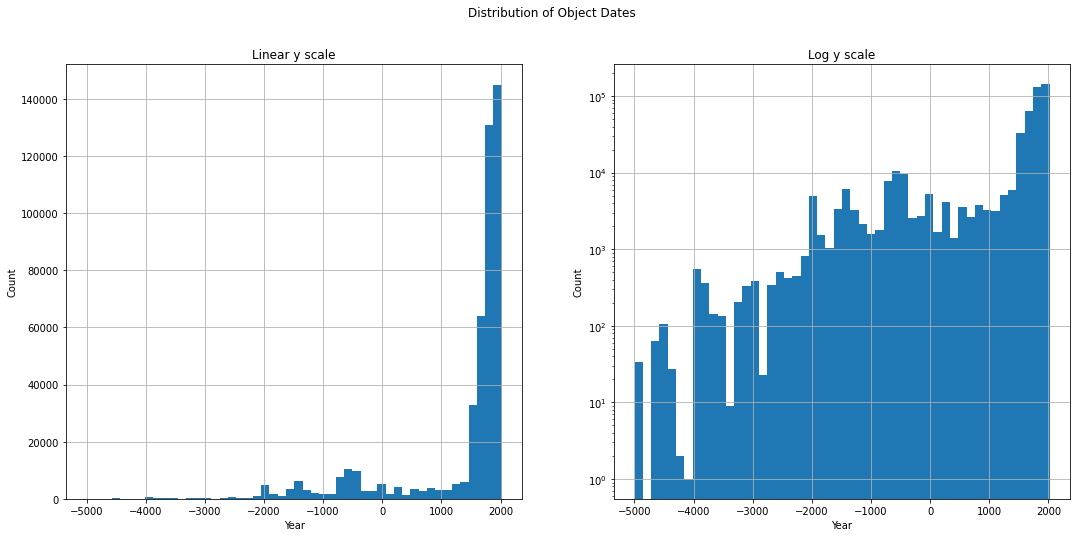

In [17]:
date_series = clean_df['Object Begin Date'].dropna()
date_series = pd.to_numeric(date_series)
date_series = date_series[date_series > -5000]
date_series = date_series[date_series<2500]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 8)
fig.suptitle("Distribution of Object Dates")
ax1.set_title('Linear y scale')
ax1.set_ylabel("Count")
ax1.set_xlabel("Year")
date_series.hist(bins=50, ax=ax1)
ax2.set_xlabel("Year")
ax2.set_ylabel("Count")
ax2.set_title('Log y scale')
ax2.set_yscale('log')
date_series.hist(bins=50, ax=ax2)